In [1]:
# Dataframe
import pandas as pd
# Numpy
import numpy as np
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation & hierarchy clustering
from scipy.cluster import hierarchy
from scipy.spatial import distance
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
# Split
from sklearn.model_selection import GridSearchCV, cross_val_score
# Pipeline
from sklearn.pipeline import make_pipeline
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
# Metrics
from sklearn.metrics import accuracy_score, make_scorer
# Measure time
from timeit import default_timer as timer

In [2]:
# Import data
df = pd.read_csv('./data/cukrzyca.csv', header=None)

# Show the first five rows with headings
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [3]:
# Add column names
df.columns = ['PREGNACIES', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN_THICKNESS', 'INSULIN', 'BMI', 'DIABETES_PEDIGREE', 'AGE', 'CLASS']

# Show the first five rows with headings
df.head()

,PREGNACIES,GLUCOSE,BLOOD_PRESSURE,SKIN_THICKNESS,INSULIN,BMI,DIABETES_PEDIGREE,AGE,CLASS
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
# Change of descriptive categories to numerical categories
Class = LabelEncoder().fit(df['CLASS'])
df['CLASS'] = Class.transform(df['CLASS'])

# Show the first five rows with headings
df.head()

,PREGNACIES,GLUCOSE,BLOOD_PRESSURE,SKIN_THICKNESS,INSULIN,BMI,DIABETES_PEDIGREE,AGE,CLASS
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


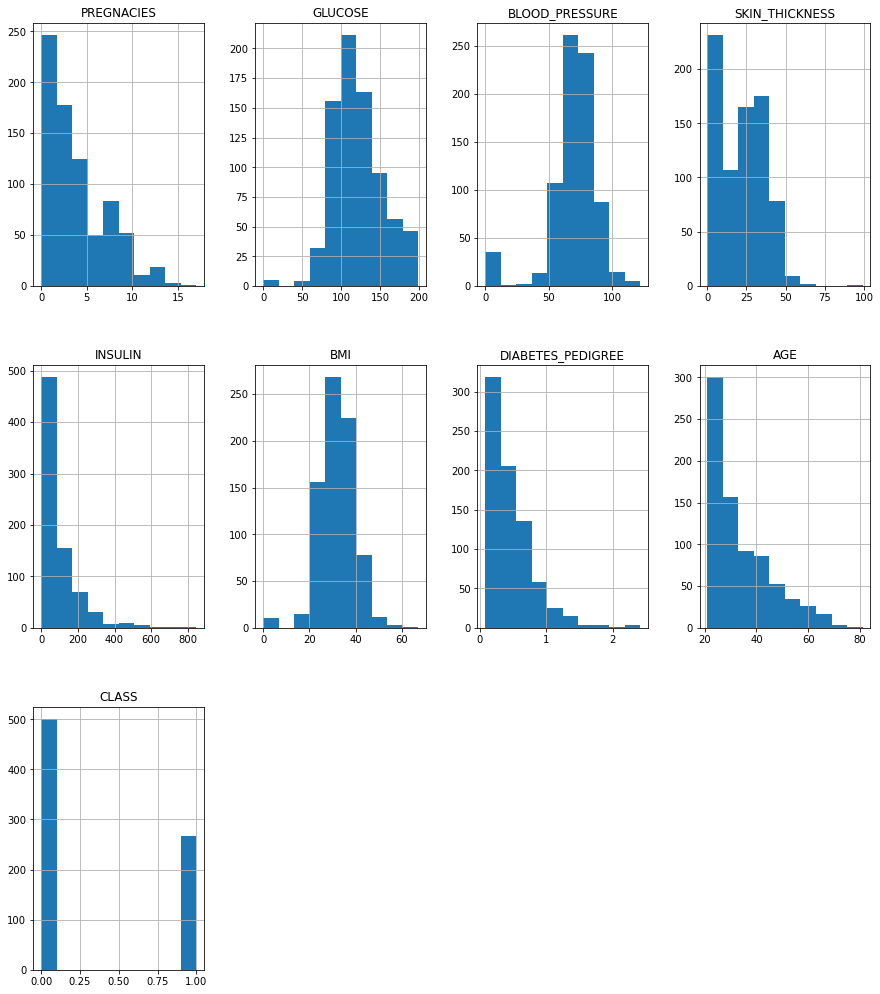

In [5]:
# Histogram plots of data
df.hist(layout=(5,4), figsize=(15,30))
plt.show()

In [6]:
# Describe & inspect dataset
df.describe()

,PREGNACIES,GLUCOSE,BLOOD_PRESSURE,SKIN_THICKNESS,INSULIN,BMI,DIABETES_PEDIGREE,AGE,CLASS
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Correlation and hierarchy clustering for analyzed data
def correlations(data):
    correlations_matrix = data.corr()
    correlations_array = np.asarray(correlations_matrix)
    row_linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')
    col_linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')
    clustermap = sns.clustermap(correlations_matrix, row_linkage=row_linkage, col_linkage=col_linkage, 
                    row_cluster=True, col_cluster=True, 
                    figsize=(8,8), cmap='Blues')
    return clustermap

# Check corr matrix for better conspect
drop_columns = ['CLASS']
cukrzyca_dropped = df.drop(drop_columns, axis=1).corr()
plot = correlations(cukrzyca_dropped)
plot